### Data loading

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2


In [4]:
data_test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [5]:
# Droping id col
data_train = data_train.drop('id', axis=1)
data_test = data_test.drop('id', axis=1)

In [6]:
# Features descriptive analysis.
data_train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='RdPu')\
                            .background_gradient(subset=['max'], cmap='BuPu')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000
feature_9,100000.000000,0.940120,1.904172,0.000000,0.000000,0.000000,1.000000,17.000000


In [7]:
# Target distribution
target_counter = data_train.target.value_counts(sort=True, ascending=False)

fig = go.Figure([go.Bar(x=target_counter.index, y=target_counter.values, marker_color='crimson')])
fig.show()

In [8]:
# Target column clasess into numbers

label_dict = {val:idx for idx, val in enumerate(sorted(data_train['target'].unique()))}
data_train['target'] = data_train['target'].map(label_dict)

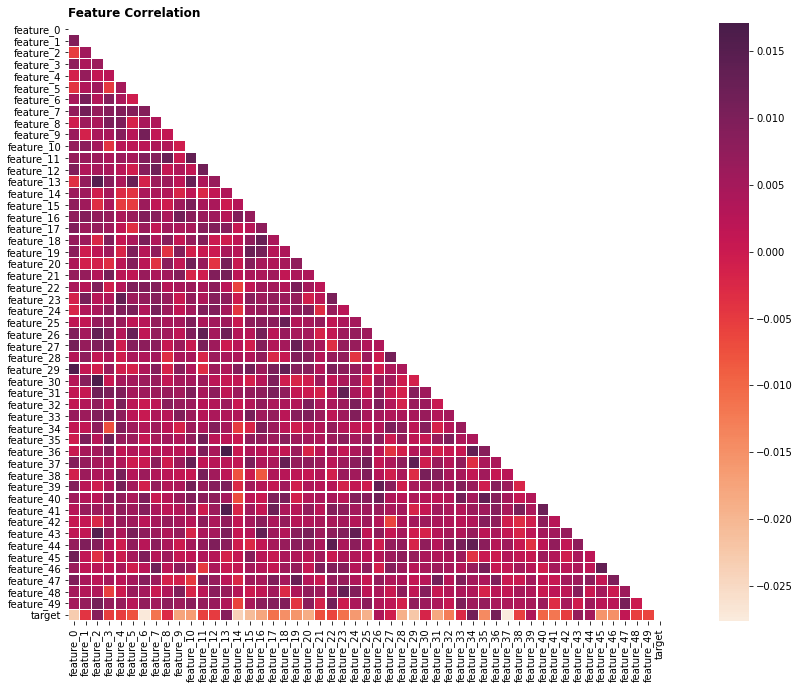

In [9]:
# Scatterplot matrix

fig, ax = plt.subplots(figsize=(19, 11))

corr = data_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
        square = True, center=0, linewidth=0.2,
        cmap = sns.color_palette("rocket_r", as_cmap=True),
        mask = mask, ax = ax) 

ax.set_title('Feature Correlation', loc='left', fontweight='bold')
plt.show()

### Outliers

In [10]:
# Before
"""x_data = data_train.iloc[:,:-1].columns

N = len(data_train.iloc[:,:-1])

y_data = [data_train[i].values for i in data_train.iloc[:,:-1].columns]

'''colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)'] '''

fig = go.Figure()

for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor='rgba(127, 96, 0, 0.5)',
            marker_size=2,
            line_width=1)
        )

fig.update_layout(
    title='Points Scored by the Top 9 Scoring NBA Players in 2012',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()"""

"x_data = data_train.iloc[:,:-1].columns\n\nN = len(data_train.iloc[:,:-1])\n\ny_data = [data_train[i].values for i in data_train.iloc[:,:-1].columns]\n\n'''colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',\n          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)'] '''\n\nfig = go.Figure()\n\nfor xd, yd in zip(x_data, y_data):\n        fig.add_trace(go.Box(\n            y=yd,\n            name=xd,\n            boxpoints='all',\n            jitter=0.5,\n            whiskerwidth=0.2,\n            fillcolor='rgba(127, 96, 0, 0.5)',\n            marker_size=2,\n            line_width=1)\n        )\n\nfig.update_layout(\n    title='Points Scored by the Top 9 Scoring NBA Players in 2012',\n    yaxis=dict(\n        autorange=True,\n        showgrid=True,\n        zeroline=True,\n        dtick=5,\n        gridcolor='rgb(255, 255, 255)',\n        gridwidth=1,\n        zerolinecolor='rgb(255, 255, 255)',\n        zerolinewid

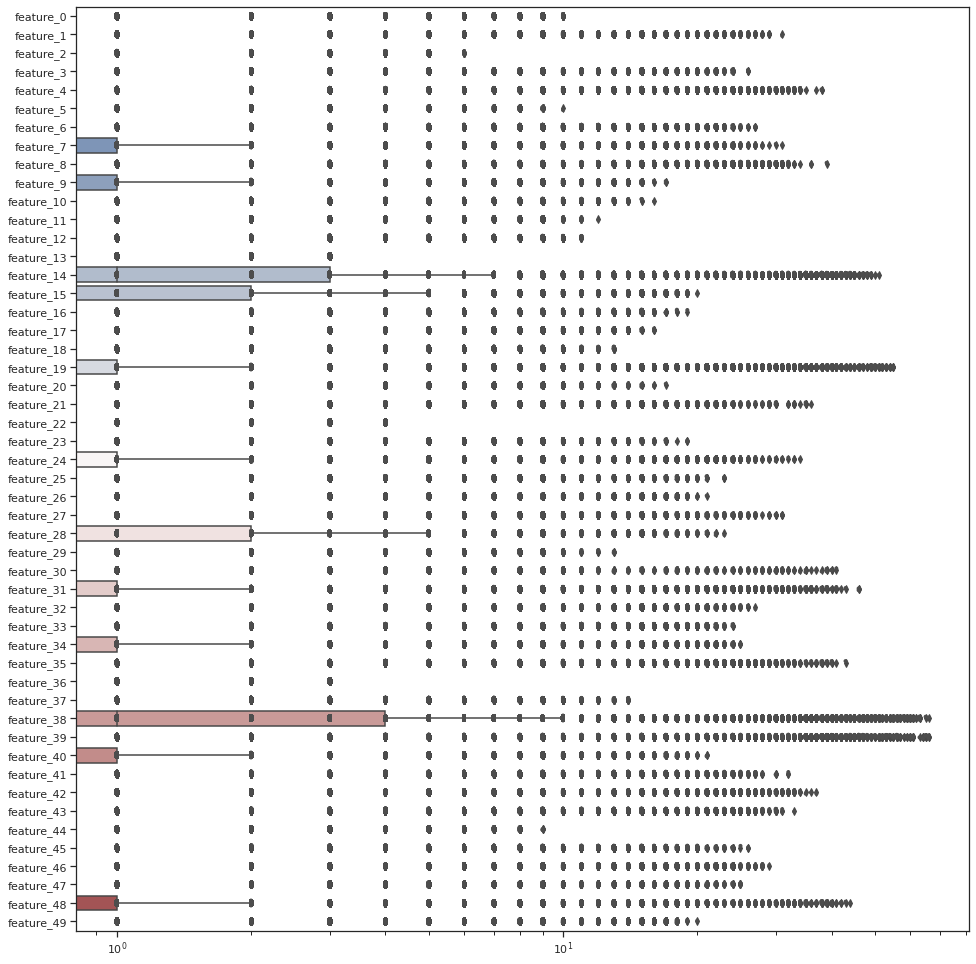

In [37]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(16, 17))
ax.set_xscale("log")

sns.boxplot(data=data_train.iloc[:,:-1], orient="h", palette="vlag")

sns.stripplot(data=data_train.iloc[:,:-1], orient="h",
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [27]:
# outliers removal

data_train_wo = data_train.copy()

for i in data_train_wo.iloc[:,:-1].columns:
  data_train_wo = data_train_wo[(data_train_wo[i] >= data_train[i].quantile(.00)) & (data_train_wo[i] <= data_train[i].quantile(.993))]


In [ ]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(16, 17))
ax.set_xscale("log")

sns.boxplot(data=data_train_wo.iloc[:,:-1], orient="h", palette="vlag")

sns.stripplot(data=data_train_wo.iloc[:,:-1], orient="h",
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [ ]:
"""# After
# Before
x_data = data_train_wo.iloc[:,:-1].columns

N = len(data_train_wo.iloc[:,:-1])

y_data = [data_train_wo[i].values for i in data_train_wo.iloc[:,:-1].columns]

'''colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)'] '''

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor='rgba(127, 96, 0, 0.5)',
            marker_size=2,
            line_width=1)
        )

fig.update_layout(
    title='Points Scored by the Top 9 Scoring NBA Players in 2012',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()"""

### Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_train = data_train_wo.copy()
scaled_train.iloc[:,:-1] = sc.fit_transform(scaled_train.iloc[:,:-1])
scaled_test = pd.DataFrame(sc.transform(data_test), columns=list(data_test.columns))

In [ ]:
scaled_train.head()

In [ ]:
scaled_test.head()

### H2O

### Grid searching and predictions

PyCaret